In [7]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams["font.size"] = 12

## Instructions

To use `rosbag` run the command `rosbag record -a`, to start the recording and press `ctrl + C` to end the recording.

Then set `bag_filename` to the name of the bag file.

In [2]:
bag_filename = "/home/bolun/bagfiles/FrankaArmTrackingFL.bag"
bag = bagreader(bag_filename)

[INFO]  Successfully created the data folder /home/bolun/bagfiles/FrankaArmTrackingFL.


In [3]:
ee_desired_pos = bag.message_by_topic(topic="/ee_desired_pos")
ee_desired_pos_csv = pd.read_csv(ee_desired_pos)

ee_measured_pos = bag.message_by_topic(topic="/ee_measured_pos")
ee_measured_pos_csv = pd.read_csv(ee_measured_pos)

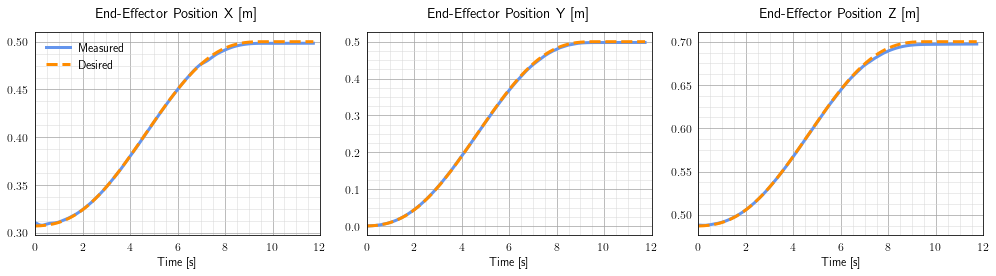

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
time_init = ee_measured_pos_csv["Time"][0]

axs[0].plot(ee_measured_pos_csv["Time"]-time_init, ee_measured_pos_csv["vector.x"], linewidth=3, color="cornflowerblue", label="Measured")
axs[0].plot(ee_desired_pos_csv["Time"]-time_init, ee_desired_pos_csv["vector.x"], linewidth=3, color="darkorange", linestyle="dashed", label="Desired")
axs[0].set_title("End-Effector Position X [m]", pad=15)
axs[0].set_xlabel("Time [s]")
axs[0].legend(frameon=False)
axs[0].yaxis.set_major_locator(MultipleLocator(0.05))
axs[0].yaxis.set_minor_locator(MultipleLocator(0.0125))

axs[1].plot(ee_measured_pos_csv["Time"]-time_init, ee_measured_pos_csv["vector.y"], linewidth=3, color="cornflowerblue")
axs[1].plot(ee_desired_pos_csv["Time"]-time_init, ee_desired_pos_csv["vector.y"], linewidth=3, color="darkorange", linestyle="dashed")
axs[1].set_title("End-Effector Position Y [m]", pad=15)
axs[1].set_xlabel("Time [s]")
axs[1].yaxis.set_major_locator(MultipleLocator(0.1))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.025))

axs[2].plot(ee_measured_pos_csv["Time"]-time_init, ee_measured_pos_csv["vector.z"], linewidth=3, color="cornflowerblue")
axs[2].plot(ee_desired_pos_csv["Time"]-time_init, ee_desired_pos_csv["vector.z"], linewidth=3, color="darkorange", linestyle="dashed")
axs[2].set_title("End-Effector Position Z [m]", pad=15)
axs[2].set_xlabel("Time [s]")
axs[2].yaxis.set_major_locator(MultipleLocator(0.05))
axs[2].yaxis.set_minor_locator(MultipleLocator(0.0125))

for i in range(3):
    axs[i].xaxis.set_major_locator(MultipleLocator(2.0))
    axs[i].xaxis.set_minor_locator(MultipleLocator(0.5))
    
    axs[i].grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
    axs[i].grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
    axs[i].tick_params(which="both", bottom=False, left=False)
    axs[i].set_xlim([0, 12])

plt.tight_layout()
plt.savefig("franka_arm.png", dpi=200, transparent=False, bbox_inches="tight")
plt.show()